In [0]:
access_key = ''
secret_key = ''
encoded_secret_key = secret_key.replace("/", "%2F")
aws_bucket_name = "imdb-project-kc"
mount_name = "s3dataread"
#dbutils.fs.mount(f"s3a://{access_key}:{encoded_secret_key}@{aws_bucket_name}", f"/mnt/{mount_name}")

In [0]:
display(dbutils.fs.ls(f"/mnt/{mount_name}"))

path,name,size,modificationTime
dbfs:/mnt/s3dataread/curated/,curated/,0,0
dbfs:/mnt/s3dataread/landing/,landing/,0,0
dbfs:/mnt/s3dataread/models/,models/,0,0
dbfs:/mnt/s3dataread/raw/,raw/,0,0
dbfs:/mnt/s3dataread/trusted/,trusted/,0,0


In [0]:
# Read the business data from s3
file_location_business = "dbfs:/mnt/s3dataread/landing/yelp_academic_dataset_business.json"
df_business = spark.read.json(file_location_business)
df_business.show(5)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

In [0]:
# Convert to dataframe
df_business = df_business.toPandas()

In [0]:
# Get number of columns and rows
print(df_business.shape)

(150346, 14)


In [0]:
# Get all columns names
print(df_business.columns)

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')


In [0]:
# Find missing value
print(df_business.isna().sum())

address             0
attributes      13744
business_id         0
categories        103
city                0
hours           23223
is_open             0
latitude            0
longitude           0
name                0
postal_code         0
review_count        0
stars               0
state               0
dtype: int64


In [0]:
# Get statistics of all numerical columns
print(df_business.describe())

            is_open       latitude      longitude   review_count  \
count  150346.00000  150346.000000  150346.000000  150346.000000   
mean        0.79615      36.671150     -89.357339      44.866561   
std         0.40286       5.872759      14.918502     121.120136   
min         0.00000      27.555127    -120.095137       5.000000   
25%         1.00000      32.187293     -90.357810       8.000000   
50%         1.00000      38.777413     -86.121179      15.000000   
75%         1.00000      39.954036     -75.421542      37.000000   
max         1.00000      53.679197     -73.200457    7568.000000   

               stars  
count  150346.000000  
mean        3.596724  
std         0.974421  
min         1.000000  
25%         3.000000  
50%         3.500000  
75%         4.500000  
max         5.000000  


In [0]:
import matplotlib.pyplot as plt

Out[22]: (array([ 1986.,  4932.,  9527., 14316.,     0., 18453., 26519., 31125.,
        27181., 16307.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

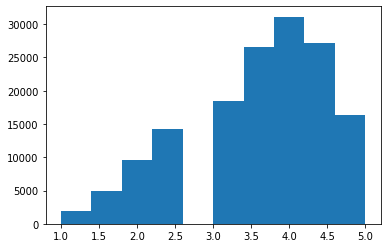

In [0]:
# Plot a histogram of the stars column
plt.hist(df_business['stars'])

In [0]:
# Read the user data from s3
file_location_user = "dbfs:/mnt/s3dataread/landing/yelp_academic_dataset_user.json"
df_user = spark.read.json(file_location_user)
df_user.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|  name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|         3.91|    

In [0]:
# Convert to dataframe
df_user = df_user.toPandas()

In [0]:
# Get number of columns and rows
print(df_user.shape)

(1987897, 22)


In [0]:
# Get all columns names
print(df_user.columns)

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful',
       'user_id', 'yelping_since'],
      dtype='object')


In [0]:
# Find missing value
print(df_user.isna().sum())

average_stars         0
compliment_cool       0
compliment_cute       0
compliment_funny      0
compliment_hot        0
compliment_list       0
compliment_more       0
compliment_note       0
compliment_photos     0
compliment_plain      0
compliment_profile    0
compliment_writer     0
cool                  0
elite                 0
fans                  0
friends               0
funny                 0
name                  0
review_count          0
useful                0
user_id               0
yelping_since         0
dtype: int64


In [0]:
# Get statistics of all numerical columns
print(df_user.describe())

       average_stars  compliment_cool  compliment_cute  compliment_funny  \
count   1.987897e+06     1.987897e+06     1.987897e+06      1.987897e+06   
mean    3.630494e+00     2.829308e+00     1.336493e-01      2.829308e+00   
std     1.183337e+00     9.666385e+01     1.135682e+01      9.666385e+01   
min     1.000000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
25%     3.000000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
50%     3.880000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
75%     4.560000e+00     0.000000e+00     0.000000e+00      0.000000e+00   
max     5.000000e+00     4.996700e+04     1.365400e+04      4.996700e+04   

       compliment_hot  compliment_list  compliment_more  compliment_note  \
count    1.987897e+06     1.987897e+06     1.987897e+06     1.987897e+06   
mean     1.807072e+00     6.390723e-02     2.922631e-01     1.443135e+00   
std      7.360184e+01     1.004363e+01     1.282467e+01     6.016790e+01   
min      0.

Out[31]: (array([176496.,  28781.,  69728.,  79929.,  82169., 249227., 262268.,
        301161., 257359., 480779.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

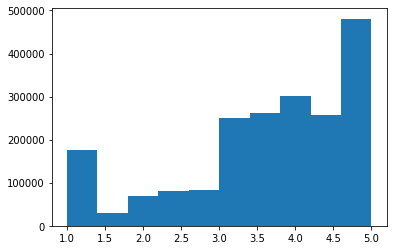

In [0]:
# Plot a histogram of the average_stars column
print(plt.hist(df_user['average_stars']))

In [0]:
# Read the review data from s3
file_location_review = "dbfs:/mnt/s3dataread/landing/yelp_academic_dataset_review.json"
df_review = spark.read.json(file_location_review)
df_review.show(5)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|   0|2018-07-07 22:09:11|    0|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|     0|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|   1|2012-01-03 15:28:18|    0|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|     1|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|   0|2014-02-05 20:30:30|    0|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|     0|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|   1|2015-01-04 00:01:03|    0|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|     1|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|   1|2017-01-14 20:54:15|    0|Sx8TMOWLNuJBWer-0...|  4.0|Cute inter

In [0]:
# Apply schema to the data
df_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [0]:
# Count number of rows
df_review.count()

Out[10]: 6990280

In [0]:
# Get all columns names
df_review.columns

Out[11]: ['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [0]:
# Get statistics of the numeric columns
df_review.select(["cool","funny","stars","useful"]).describe().show()

+-------+------------------+-------------------+------------------+------------------+
|summary|              cool|              funny|             stars|            useful|
+-------+------------------+-------------------+------------------+------------------+
|  count|           6990280|            6990280|           6990280|           6990280|
|   mean|0.4986175088837643|0.32655959417934616|  3.74858374771826|1.1846089140921394|
| stddev| 2.172459820211183| 1.6887290985540466|1.4787045052556833|3.2537669669333593|
|    min|                -1|                 -1|               1.0|                -1|
|    max|               404|                792|               5.0|              1182|
+-------+------------------+-------------------+------------------+------------------+



In [0]:
# Find missing value
from pyspark.sql.functions import isnan, when, count, col

df_review.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_review.columns]).show()

+-----------+----+----+-----+---------+-----+----+------+-------+
|business_id|cool|date|funny|review_id|stars|text|useful|user_id|
+-----------+----+----+-----+---------+-----+----+------+-------+
|          0|   0|   0|    0|        0|    0|   0|     0|      0|
+-----------+----+----+-----+---------+-----+----+------+-------+



In [0]:
# List of columns to remove from dataset
cols_to_drop = ['cool', 'funny', 'useful']

# Drop columns in list
df_review = df_review.drop(*cols_to_drop)

df_review.show(5)

+--------------------+-------------------+--------------------+-----+--------------------+--------------------+
|         business_id|               date|           review_id|stars|                text|             user_id|
+--------------------+-------------------+--------------------+-----+--------------------+--------------------+
|XQfwVwDr-v0ZS3_Cb...|2018-07-07 22:09:11|KU_O5udG6zpxOg-Vc...|  3.0|If you decide to ...|mh_-eMZ6K5RLWhZyI...|
|7ATYjTIgM3jUlt4UM...|2012-01-03 15:28:18|BiTunyQ73aT9WBnpR...|  5.0|I've taken a lot ...|OyoGAe7OKpv6SyGZT...|
|YjUWPpI6HXG530lwP...|2014-02-05 20:30:30|saUsX_uimxRlCVr67...|  3.0|Family diner. Had...|8g_iMtfSiwikVnbP2...|
|kxX2SOes4o-D3ZQBk...|2015-01-04 00:01:03|AqPFMleE6RsU23_au...|  5.0|Wow!  Yummy, diff...|_7bHUi9Uuf5__HHc_...|
|e4Vwtrqf-wpJfwesg...|2017-01-14 20:54:15|Sx8TMOWLNuJBWer-0...|  4.0|Cute interior and...|bcjbaE6dDog4jkNY9...|
+--------------------+-------------------+--------------------+-----+--------------------+--------------

In [0]:
# Save the cleaned review data to s3
df_review.write.mode("overwrite").parquet("dbfs:/mnt/s3dataread/raw/review.parquet")

In [0]:
# Read the business data from s3
file_location_business = "dbfs:/mnt/s3dataread/landing/yelp_academic_dataset_business.json"
df_business = spark.read.json(file_location_business)
df_business.show(5)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|  latitude|   longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+----------+------------+--------------------+-----------+------------+-----+-----+
|1616 Chapala St, ...|{null, null, null...|Pns2l4eNsfO8kk83d...|Doctors, Traditio...|Santa Barbara|                null|      0|34.4266787|-119.7111968|Abby Rappoport, L...|      93101|           7|  5.0|   CA|
|87 Grasso Plaza S...|{null, null, null...|mpf3x-BjTdTEA3yCZ...|Shipping Centers,...|       Affton|{8:0-18:30, 0:0-0...|      1| 38.551126|  -90.335695|    

In [0]:
# Apply schema to the data
df_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [0]:
# Count number of rows
df_business.count()

Out[82]: 150346

In [0]:
# Get all columns names
df_business.columns

Out[83]: ['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'postal_code',
 'review_count',
 'stars',
 'state']

In [0]:
#Convert the string into an array
df_business_array = df_business.withColumn("categories_splitted", split("categories", ","))

#Split the categories column into rows
df_business_splitted = df_business_array.select("business_id","is_open","latitude","longitude","city","postal_code","state","review_count","stars", explode("categories_splitted").alias("category"))

df_business_splitted.show()

+--------------------+-------+----------+------------+-------------+-----------+-----+------------+-----+--------------------+
|         business_id|is_open|  latitude|   longitude|         city|postal_code|state|review_count|stars|            category|
+--------------------+-------+----------+------------+-------------+-----------+-----+------------+-----+--------------------+
|Pns2l4eNsfO8kk83d...|      0|34.4266787|-119.7111968|Santa Barbara|      93101|   CA|           7|  5.0|             Doctors|
|Pns2l4eNsfO8kk83d...|      0|34.4266787|-119.7111968|Santa Barbara|      93101|   CA|           7|  5.0| Traditional Chin...|
|Pns2l4eNsfO8kk83d...|      0|34.4266787|-119.7111968|Santa Barbara|      93101|   CA|           7|  5.0| Naturopathic/Hol...|
|Pns2l4eNsfO8kk83d...|      0|34.4266787|-119.7111968|Santa Barbara|      93101|   CA|           7|  5.0|         Acupuncture|
|Pns2l4eNsfO8kk83d...|      0|34.4266787|-119.7111968|Santa Barbara|      93101|   CA|           7|  5.0|    He

In [0]:
# Find missing value
from pyspark.sql.functions import isnan, when, count, col

df_business_splitted.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_business_splitted.columns]).show()

+-----------+-------+--------+---------+----+-----------+-----+------------+-----+--------+
|business_id|is_open|latitude|longitude|city|postal_code|state|review_count|stars|category|
+-----------+-------+--------+---------+----+-----------+-----+------------+-----+--------+
|          0|      0|       0|        0|   0|          0|    0|           0|    0|       0|
+-----------+-------+--------+---------+----+-----------+-----+------------+-----+--------+



In [0]:
# Save the cleaned business data to s3
df_business_splitted.write.mode("overwrite").parquet("dbfs:/mnt/s3dataread/raw/business.parquet")